In [1]:
import pandas as pd

import re
!pip install emoji
import emoji  # Install via pip install emoji


import nltk
from nltk.tokenize import word_tokenize  # Add this impor

nltk.download('punkt')          # General tokenizer data

!pip install pyarabic
from pyarabic.araby import tokenize  # Import Arabic tokenizer

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.isri import ISRIStemmer  # Stemmer for Arabic'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 3.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Collection step :

In [2]:
# Load the Excel file dataset into a dataframe
df = pd.read_excel('combined_dataset.xlsx')

In [3]:
# Keep only the 'label' and 'text' columns from the DataFrame
df = df[['label', 'text']]
df

,label,text
0,1,والله شايفيتلك الناس كلها صاير عندها اكتئاب لا...
1,1,اكيد اكتئاب بعد العصر ما في زيه بس ان شاء الله...
2,1,والله ما أنا عارف هو اكتئاب ولا انطفاء ولا نضج...
3,1,اصبروا داخله في حاله اكتئاب 💔😭
4,1,هذا اكتئاب ولا
...,...,...
11853,1,قلنا ان اهلي مايحبوني مو لدرجه اصحي وماحصل احد...
11854,0,يوم جميل جدا
11855,0,الهم ابي سندي الهم امي نبضي الهم اخواني ...
11856,1,اكره الدوام واكره الجامعه واكره الصباح


In [4]:
# Remove rows with empty values
df.dropna(inplace=True)
# Remove duplicate rows
df = df.drop_duplicates()

In [5]:
# Check if the dataset is balanced by showing class distribution percentages
print("Class Distribution:\n", df['label'].value_counts(normalize=True))

Class Distribution:
 label
1    0.500211
0    0.499789
Name: proportion, dtype: float64


In [6]:
# Get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11843 entries, 0 to 11857
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   11843 non-null  int64 
 1   text    11843 non-null  object
dtypes: int64(1), object(1)
memory usage: 277.6+ KB
None


# Data Preprocessing :

In [7]:

# Get NLTK Arabic stopwords and normalize them

"""
#Stopwords Removal Problem
#My text was normalized, but NLTK stopwords were not. So,
#they didn’t match, and stopwords weren’t removed. I fixed it by normalizing the
#stopwords too and saving them in a set called normalized_stopwords."""



arabic_stopwords = set(stopwords.words('arabic'))

normalized_stopwords = set()

for word in arabic_stopwords:
    # Apply the same normalization as your text
    word = re.sub("[إأآا]", "ا", word)  # Normalize Alef
    word = re.sub("ى", "ي", word)       # Normalize Ya
    word = re.sub("[ؤئ]", "ء", word)    # Normalize Hamza
    normalized_stopwords.add(word)



def data_cleaner(text):

    # Step 1: Remove URLs, hashtags, mentions
    text = re.sub(r'http\S+', '', text)        # Remove URLs
    text = re.sub(r'[@#]\w+', '', text)        # Remove mentions (@) and hashtags (#)

    # Step 2: Normalize Arabic text (remove diacritics)
    text = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text)  # Remove Arabic diacritics

    # Step 3: Normalize Hamza and Alef variations
    text = re.sub("[إأآا]", "ا", text)         # Normalize Alef variations
    text = re.sub("ى", "ي", text)              # Normalize Ya
    text = re.sub("ؤ", "ء", text)              # Normalize Hamza
    text = re.sub("ئ", "ء", text)              # Normalize Hamza

    # Step 4: Remove emojis (using emoji library + regex)
    text = emoji.replace_emoji(text, replace='')  # Remove emojis using the emoji library

    # Step 5: Remove punctuation and special characters
    arabic_punct = r'[،؛؟.!\"\'\(\)\[\]\{\}:;,\.\?]'  # Define Arabic punctuation
    text = re.sub(arabic_punct, ' ', text)     # Replace with space

    # Step 6: Remove numbers
    text = re.sub(r'\d+', '', text)            # Remove digits

    # Step 7: Remove English letters (A-Za-z)
    text = re.sub(r'[A-Za-z]', '', text)       # Remove English characters

    # Step 8: Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()   # Collapse multiple spaces

    # Step 9: Tokenize the cleaned text
    tokens = tokenize(text)  # Arabic-specific tokenization

    # Debugging: Print tokens to verify
    #print(f"Original: {text}")
    #print(f"Tokens: {tokens}")

    # Step 10: Remove stopwrods
    tokens = [word for word in tokens if word not in normalized_stopwords]

    #Step 11: Stem tokens

    # Initialize stemmer
    stemmer = ISRIStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Step 12: Remove any remaining garbage characters
    tokens = [word for word in tokens if re.match(r'^[\u0620-\u064A]+$', word)]

    # Join tokens and return the cleaned text
    cleaned_text = " ".join(tokens)

    return cleaned_text

In [8]:
# Apply data_cleaner function on the dataset text
df['text'] = df['text'].apply(lambda x: data_cleaner(x))
print(df.head())

   label                                               text
0      1   ولل شايفيتلك ناس كله صير عند كءب لزم فكو حظر بكف
1      1  اكد كءب عصر زيه شاء الل عيد دا اشف عمل تطع خير...
2      1                        ولل عرف كءب طفء نضج وحد وحد
3      1                                    صبر دخل حله كءب
4      1                                                كءب


<ipython-input-8-d53f6699c614>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: data_cleaner(x))


In [9]:
print(df.info())  # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 11843 entries, 0 to 11857
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   11843 non-null  int64 
 1   text    11843 non-null  object
dtypes: int64(1), object(1)
memory usage: 277.6+ KB
None


In [10]:
df = df[df['text'].str.strip().astype(bool)]  # Remove empty texts

In [11]:
print(df.info())  # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 11838 entries, 0 to 11857
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   11838 non-null  int64 
 1   text    11838 non-null  object
dtypes: int64(1), object(1)
memory usage: 277.5+ KB
None


# Feature Extraction & Feature Selection

In [12]:
# Vectorivation

from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer with custom settings

#Feature Selection:

tfidf = TfidfVectorizer(
    #max_features=5000,
    #ngram_range=(1, 2),
    # convert the normalized_stopwrods set to a list to make it work correctly with vectorization step
    #stop_words= list(normalized_stopwords),
    max_features=10000,        # Use the top 10,000 most important words
    ngram_range=(1, 3),        # Include unigrams, bigrams, and trigrams
    min_df=3,                  # Ignore words that appear in fewer than 3 documents
    max_df=0.9                 # Ignore words that appear in more than 90% of the documents

)

#Feature Extraction:

# Apply the vectorizer to the 'text' column to convert it into numeric features
X = tfidf.fit_transform(df['text'])
# Set the target labels (depressed = 1, non-depressed = 0)
y = df['label']

In [13]:
print(tfidf.get_feature_names_out()[:20])  # peek at vocabulary


['ءثر' 'ءجر' 'ءخر' 'ءذي' 'ءسف' 'ءشر' 'ءقت' 'ءكد' 'ءلم' 'ءلم تنم'
 'ءلم تنم ليل' 'ءلم جمل' 'ءلم جمل ذكر' 'ءمر' 'ءمن' 'ءمن افق' 'ءمن افق غيب'
 'اءم' 'ااه' 'ابا']


# Feature Classification

In [14]:
 # Split into training (80%) and testing (20%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,  # TF-IDF vectors (features)
    y,  # Labels (0 = non-depressed, 1 = depressed)
    test_size=0.2,  # 20% for testing
    random_state=42,  # ensures the split is the same every time (for reproducibility)
    stratify=y # Ensures balanced class distribution in both sets
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")





Training samples: 9470
Testing samples: 2368


# Stacking (Stacked Generalization)

In [16]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report


base_models = [
    ('svm', SVC(kernel='linear', probability=True)),
    ('nb', MultinomialNB())
]

stack_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1183
           1       0.95      0.94      0.94      1185

    accuracy                           0.94      2368
   macro avg       0.94      0.94      0.94      2368
weighted avg       0.94      0.94      0.94      2368



# Cofusion Matrix

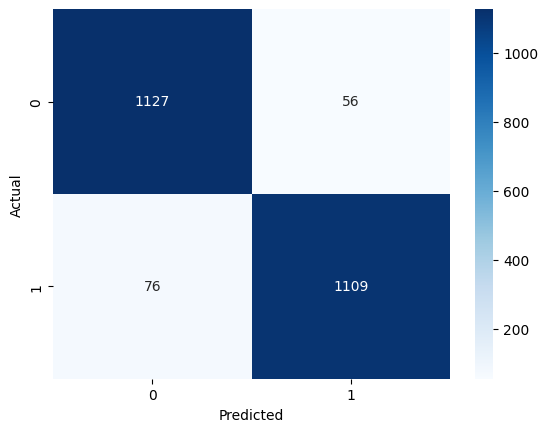

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
# ================================
# Save Stacking Model and TF-IDF
# ================================

import joblib

# Save the trained stacking model
joblib.dump(stack_model, 'stacking_model.pkl')

# Save the fitted TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!
